In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm


In [2]:
df_banes = pd.read_csv("BANES_cleaned_final.csv", parse_dates=["time"])
df_banes.head()


,time,location,postcode,energy
0,2006-10-01 00:30:00+00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.8
1,2006-10-01 01:00:00+00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,33.0
2,2006-10-01 01:30:00+00:00,Bath Central Library Electricity (HH),BA1 5AL,5.9
3,2006-10-01 02:00:00+00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.2
4,2006-10-01 02:30:00+00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,31.3


In [3]:
df_weather = pd.read_csv("Bath_hourly_cleaned_30min.csv", parse_dates=["time"])

# drop unnamed columns
df_weather.drop("Unnamed: 0", axis=1, inplace=True)

df_weather.head()


,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco
0,2006-10-01 00:00:00,15.10,14.10,94.0,0.0,0.0,170.0,13.0,NaN,1001.9,NaN
1,2006-10-01 00:30:00,14.95,13.80,93.0,0.0,0.0,175.0,13.9,NaN,1001.8,NaN
2,2006-10-01 01:00:00,14.80,13.50,92.0,0.0,0.0,180.0,14.8,NaN,1001.7,NaN
3,2006-10-01 01:30:00,14.75,13.35,91.5,0.0,0.0,180.0,13.9,NaN,1001.7,NaN
4,2006-10-01 02:00:00,14.70,13.20,91.0,0.0,0.0,180.0,13.0,NaN,1001.7,NaN


In [4]:
df_banes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980288 entries, 0 to 7980287
Data columns (total 4 columns):
 #   Column    Dtype              
---  ------    -----              
 0   time      datetime64[ns, UTC]
 1   location  object             
 2   postcode  object             
 3   energy    float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 243.5+ MB


In [5]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234146 entries, 0 to 234145
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time    234146 non-null  datetime64[ns]
 1   temp    234146 non-null  float64       
 2   dwpt    234146 non-null  float64       
 3   rhum    234146 non-null  float64       
 4   prcp    234146 non-null  float64       
 5   snow    234146 non-null  float64       
 6   wdir    234146 non-null  float64       
 7   wspd    234146 non-null  float64       
 8   wpgt    12339 non-null   float64       
 9   pres    234146 non-null  float64       
 10  coco    16926 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 19.7 MB


BANES has type `datetime64[ns,UTC]`. Parse it to `datetime64[ns]`.

In [6]:
# parse datetime64[ns, UTC] to datetime64[ns]
df_banes["time"] = df_banes["time"].dt.tz_localize(None)

df_banes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980288 entries, 0 to 7980287
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   time      datetime64[ns]
 1   location  object        
 2   postcode  object        
 3   energy    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 243.5+ MB


In [7]:
# merge datasets on time
df_merged = pd.merge(df_banes, df_weather, on="time")

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7980288 entries, 0 to 7980287
Data columns (total 14 columns):
 #   Column    Dtype         
---  ------    -----         
 0   time      datetime64[ns]
 1   location  object        
 2   postcode  object        
 3   energy    float64       
 4   temp      float64       
 5   dwpt      float64       
 6   rhum      float64       
 7   prcp      float64       
 8   snow      float64       
 9   wdir      float64       
 10  wspd      float64       
 11  wpgt      float64       
 12  pres      float64       
 13  coco      float64       
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 913.3+ MB


In [8]:
df_merged.isnull().sum()

time              0
location          0
postcode          0
energy            0
temp              0
dwpt              0
rhum              0
prcp              0
snow              0
wdir              0
wspd              0
wpgt        7381489
pres              0
coco        7173801
dtype: int64

In [9]:
df_merged.head()

,time,location,postcode,energy,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco
0,2006-10-01 00:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.8,14.95,13.80,93.0,0.0,0.0,175.0,13.9,NaN,1001.8,NaN
1,2006-10-01 00:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.8,14.95,13.80,93.0,0.0,0.0,175.0,13.9,NaN,1001.8,NaN
2,2006-10-01 01:00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,33.0,14.80,13.50,92.0,0.0,0.0,180.0,14.8,NaN,1001.7,NaN
3,2006-10-01 01:00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,33.0,14.80,13.50,92.0,0.0,0.0,180.0,14.8,NaN,1001.7,NaN
4,2006-10-01 01:30:00,Bath Central Library Electricity (HH),BA1 5AL,5.9,14.75,13.35,91.5,0.0,0.0,180.0,13.9,NaN,1001.7,NaN


Weird values, repeated at the beggining of the merged dataset. Are they also on the BANES dataset, or is it an error?

In [10]:
df_banes.sort_values(by="time", inplace=True)
df_banes.head()


,time,location,postcode,energy
0,2006-10-01 00:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.8
48,2006-10-01 00:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.8
49,2006-10-01 01:00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,33.0
1,2006-10-01 01:00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,33.0
2,2006-10-01 01:30:00,Bath Central Library Electricity (HH),BA1 5AL,5.9


The weird values are indeed in the BANES dataset, everything is fine, let's export the merged dataset.

In [11]:
df_merged.to_csv("BANES_weather_merged.csv", index=False)


# Machine Learning

The rest of this notebook will use the state-of-the-art algorithms reviewed with the weather data.

### Gradient Boost

In [2]:
# import libraries for Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [6]:
df = pd.read_csv("BANES_weather_merged.csv", parse_dates=["time"])
df.describe()


,energy,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco
count,7.980288e+06,7.980288e+06,7.980288e+06,7.980288e+06,7.980288e+06,7980288.0,7.980288e+06,7.980288e+06,598799.000000,7.980288e+06,806487.000000
mean,3.986388e+00,1.061746e+01,7.757424e+00,8.369144e+01,8.988285e-03,0.0,1.913825e+02,1.681830e+01,26.166198,1.015104e+03,4.335750
std,8.404270e+00,5.347194e+00,4.841110e+00,1.285147e+01,1.092506e-01,0.0,8.833137e+01,8.369234e+00,12.331589,1.100893e+01,3.033078
min,0.000000e+00,-9.400000e+00,-1.230000e+01,1.500000e+01,0.000000e+00,0.0,1.000000e+00,0.000000e+00,3.700000,9.602000e+02,1.000000
25%,2.030000e-01,6.600000e+00,4.500000e+00,7.700000e+01,0.000000e+00,0.0,1.200000e+02,1.110000e+01,16.700000,1.008700e+03,2.000000
50%,7.400000e-01,1.060000e+01,8.000000e+00,8.700000e+01,0.000000e+00,0.0,2.100000e+02,1.570000e+01,24.100000,1.016100e+03,3.000000
75%,3.180000e+00,1.460000e+01,1.160000e+01,9.300000e+01,0.000000e+00,0.0,2.600000e+02,2.220000e+01,33.300000,1.022500e+03,7.000000
max,7.470000e+01,3.160000e+01,2.270000e+01,1.000000e+02,7.500000e+00,0.0,3.600000e+02,7.920000e+01,76.000000,1.048900e+03,25.000000


#### Pre-Processing

In [65]:
# drop unnecessary columns
df_cols = df[['time', 'location', 'postcode', 'energy', 'temp', 'rhum', 'pres']]
df_cols.head()


,time,location,postcode,energy,temp,rhum,pres
0,2006-10-01 00:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.8,14.95,93.0,1001.8
1,2006-10-01 00:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.8,14.95,93.0,1001.8
2,2006-10-01 01:00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,33.0,14.80,92.0,1001.7
3,2006-10-01 01:00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,33.0,14.80,92.0,1001.7
4,2006-10-01 01:30:00,Bath Central Library Electricity (HH),BA1 5AL,5.9,14.75,91.5,1001.7


Let's try with a single location first.

In [17]:
# location with the most data
max_location = df_cols['location'].value_counts().idxmax()
max_location


'Guildhall Electricity Supply 1 (HH)'

In [18]:
df_guild = df_cols[df_cols['location'] == max_location]
df_guild.head()

,time,location,postcode,energy,temp,rhum,pres
0,2006-10-01 00:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.8,14.95,93.0,1001.8
1,2006-10-01 00:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.8,14.95,93.0,1001.8
2,2006-10-01 01:00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,33.0,14.80,92.0,1001.7
3,2006-10-01 01:00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,33.0,14.80,92.0,1001.7
5,2006-10-01 01:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.7,14.75,91.5,1001.7


In [19]:
df_guild = df_guild.groupby(['time', 'location']).mean().reset_index()
df_guild.head()

,time,location,energy,temp,rhum,pres
0,2006-10-01 00:30:00,Guildhall Electricity Supply 1 (HH),32.8,14.95,93.0,1001.8
1,2006-10-01 01:00:00,Guildhall Electricity Supply 1 (HH),33.0,14.80,92.0,1001.7
2,2006-10-01 01:30:00,Guildhall Electricity Supply 1 (HH),32.7,14.75,91.5,1001.7
3,2006-10-01 02:00:00,Guildhall Electricity Supply 1 (HH),32.2,14.70,91.0,1001.7
4,2006-10-01 02:30:00,Guildhall Electricity Supply 1 (HH),31.3,14.55,91.5,1001.6


#### Train and test split

In [20]:
# split into train and test
train, test = train_test_split(df_guild, test_size=0.2, random_state=42)


In [21]:
train.shape, test.shape

((122661, 6), (30666, 6))

In [28]:
X_train = train.drop(['energy', 'time', 'location'], axis=1)
y_train = train['energy']
X_test = test.drop(['energy', 'time', 'location'], axis=1)
y_test = test['energy']


#### Build Model

In [82]:
# create model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0, loss='squared_error')


In [83]:
gbr.fit(X_train, y_train)

KeyboardInterrupt: 

#### Test model

In [35]:
# predict
y_pred = gbr.predict(X_test)


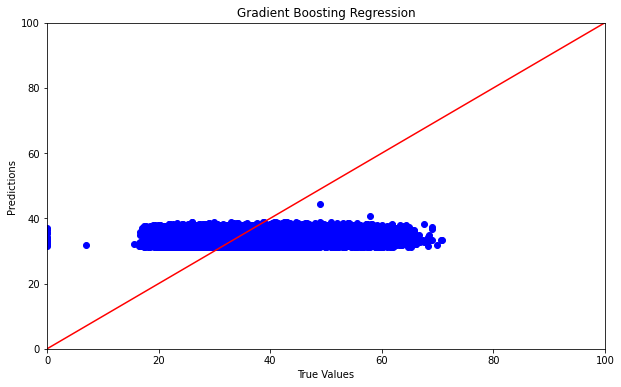

In [43]:
# plot the results
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient Boosting Regression')
plt.xlim([0, 100])
plt.ylim([0, 100])
_ = plt.plot([-100, 100], [-100, 100], color='red')
plt.show()

In [44]:
# performance metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: %.4f" % mse)
print("RMSE: %.4f" % rmse)
print("MAE: %.4f" % mae)
print("R2: %.4f" % r2)


MSE: 101.3329
RMSE: 10.0664
MAE: 8.1204
R2: 0.0442


The results were pretty bad. Let's test with the entire dataset, instead of just one location.

### GB 2

#### Pre-processing

In [46]:
df_cols.head()

,time,location,postcode,energy,temp,rhum,pres
0,2006-10-01 00:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.8,14.95,93.0,1001.8
1,2006-10-01 00:30:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,32.8,14.95,93.0,1001.8
2,2006-10-01 01:00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,33.0,14.80,92.0,1001.7
3,2006-10-01 01:00:00,Guildhall Electricity Supply 1 (HH),BA1 5AW,33.0,14.80,92.0,1001.7
4,2006-10-01 01:30:00,Bath Central Library Electricity (HH),BA1 5AL,5.9,14.75,91.5,1001.7


In [47]:
df_grouped = df_cols.groupby(['time', 'location']).mean().reset_index()
df_grouped.head()

,time,location,energy,temp,rhum,pres
0,2006-10-01 00:30:00,Guildhall Electricity Supply 1 (HH),32.8,14.95,93.0,1001.8
1,2006-10-01 01:00:00,Guildhall Electricity Supply 1 (HH),33.0,14.80,92.0,1001.7
2,2006-10-01 01:30:00,Bath Central Library Electricity (HH),5.9,14.75,91.5,1001.7
3,2006-10-01 01:30:00,Guildhall Electricity Supply 1 (HH),32.7,14.75,91.5,1001.7
4,2006-10-01 02:00:00,Guildhall Electricity Supply 1 (HH),32.2,14.70,91.0,1001.7


#### Train and test split

In [48]:
# split into train and test
train, test = train_test_split(df_grouped, test_size=0.2, random_state=42)


In [49]:
train.shape, test.shape


((4023978, 6), (1005995, 6))

In [50]:
X_train = train.drop(['energy', 'time', 'location'], axis=1)
y_train = train['energy']
X_test = test.drop(['energy', 'time', 'location'], axis=1)
y_test = test['energy']


#### Build model

In [51]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0, loss='squared_error')

In [52]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=0)

#### Test model

In [53]:
# predict
y_pred = gbr.predict(X_test)


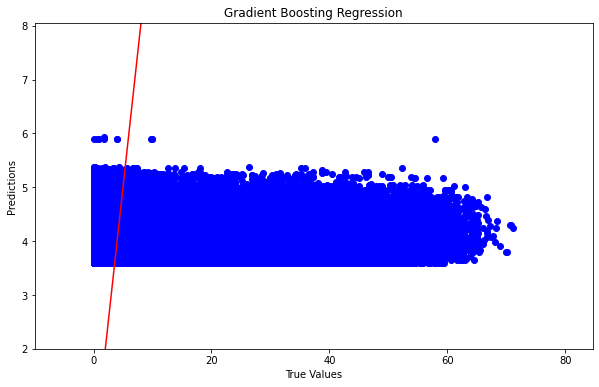

In [62]:
# plot the results
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient Boosting Regression')
plt.xlim([-10, plt.xlim()[1] + 10])
plt.ylim([2, plt.ylim()[1] + 2])
_ = plt.plot([-100, 100], [-100, 100], color='red')
plt.show()


In [61]:
# performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: %.4f" % mse)
print("RMSE: %.4f" % rmse)
print("MAE: %.4f" % mae)
print("R2: %.4f" % r2)


MSE: 72.5161
RMSE: 8.5156
MAE: 5.0668
R2: 0.0023


### GB 3

Last one, with ``locations`` and ``postcode`` as features. 

#### Pre-processing

In [66]:
# encode locations and postcode
from sklearn.preprocessing import LabelEncoder

df_copy = df_cols.copy()

le = LabelEncoder()
le.fit(df_cols['location'])
df_copy.loc[:, 'location'] = le.transform(df_cols['location'])

le = LabelEncoder()
le.fit(df_cols['postcode'])
df_copy.loc[:, 'postcode'] = le.transform(df_cols['postcode'])

df_copy.head()


,time,location,postcode,energy,temp,rhum,pres
0,2006-10-01 00:30:00,30,6,32.8,14.95,93.0,1001.8
1,2006-10-01 00:30:00,30,6,32.8,14.95,93.0,1001.8
2,2006-10-01 01:00:00,30,6,33.0,14.80,92.0,1001.7
3,2006-10-01 01:00:00,30,6,33.0,14.80,92.0,1001.7
4,2006-10-01 01:30:00,13,5,5.9,14.75,91.5,1001.7


In [67]:
# group by time, location and postcode
df_grouped = df_copy.groupby(['time', 'location', 'postcode']).mean().reset_index()
df_grouped.head()


,time,location,postcode,energy,temp,rhum,pres
0,2006-10-01 00:30:00,30,6,32.8,14.95,93.0,1001.8
1,2006-10-01 01:00:00,30,6,33.0,14.80,92.0,1001.7
2,2006-10-01 01:30:00,13,5,5.9,14.75,91.5,1001.7
3,2006-10-01 01:30:00,30,6,32.7,14.75,91.5,1001.7
4,2006-10-01 02:00:00,30,6,32.2,14.70,91.0,1001.7


#### Split into train and test data

In [68]:
# split into train and test
train, test = train_test_split(df_grouped, test_size=0.2, random_state=42)


In [69]:
X_train = train.drop(['time', 'energy'], axis=1)
y_train = train['energy']
X_test = test.drop(['time', 'energy'], axis=1)
y_test = test['energy']


#### Build model

In [74]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0, loss='squared_error')

In [75]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [76]:
# predict
y_pred = gbr.predict(X_test)


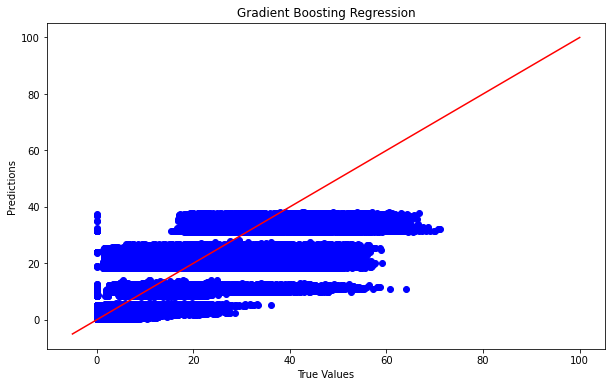

In [81]:
# plot the results
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient Boosting Regression')
_ = plt.plot([-5, 100], [-5, 100], color='red')
plt.show()


In [78]:
# performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: %.4f" % mse)
print("RMSE: %.4f" % rmse)
print("MAE: %.4f" % mae)
print("R2: %.4f" % r2)


MSE: 19.5487
RMSE: 4.4214
MAE: 2.3196
R2: 0.7311
